# Credit Risk Classification

This dataset helps find out whether customer is credit risky or credit worthy in Banking perspective

##### 1) How would you define and find out credit riskiness?
##### 2) What is the behaviour of Credit Worthy Customer?

In [2]:
import pandas as pd
import numpy as np

In [3]:
customer = pd.read_csv('C:/Users/avdho/Desktop/Practices/Explorations/Credit Risk Classification/customer_data.csv')
#payment = pd.read_csv('C:/Users/avdho/Desktop/Practices/Explorations/Credit Risk Classification/payment_data.csv')
customer.head(5)

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000,2,11,5,108,4,450081,197.403141


#### Exploratory Analysis 

In [4]:
customer.shape

(1125, 13)

In [5]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   int64  
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 114.4 KB


In [6]:
# let's look at the stats for eah column in Customer table
customer.describe()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1.125000e+03,1125.000000,976.000000,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,5.783677e+07,5.482667,1283.911373,2.333333,1.208836e+05,1.928889,10.872000,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1.817150e+06,1.383338,51.764022,0.878773,8.844523e+04,0.257125,2.676437,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,5.499050e+07,4.000000,1244.000000,1.000000,7.200000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,5.898975e+07,5.000000,1281.500000,3.000000,1.020000e+05,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,5.899799e+07,7.000000,1314.500000,3.000000,1.390000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


In [7]:
# check for null values
customer.isnull().sum()

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

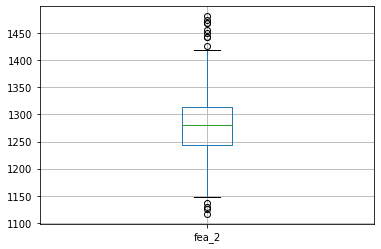

In [8]:
# handling null values
# We can fill out null values in fea_2 either by mean or median depending on distribution of other points in that column
customer.boxplot(column =['fea_2'])

In [9]:
# As there is not an extreme outlier in the values present in the fea_2 colum, we can fill the null values wtih mean
# calculating mean of fea_2 column
mean_fea2 = round(customer['fea_2'].mean(), 1)
# filling out the null values
customer['fea_2'].fillna(value=mean_fea2, inplace=True)
customer.isnull().sum()

label     0
id        0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64

In [10]:
customer['id'].nunique()
# there are 1125 ids, that means 1125 customers that we are analyzing

1125

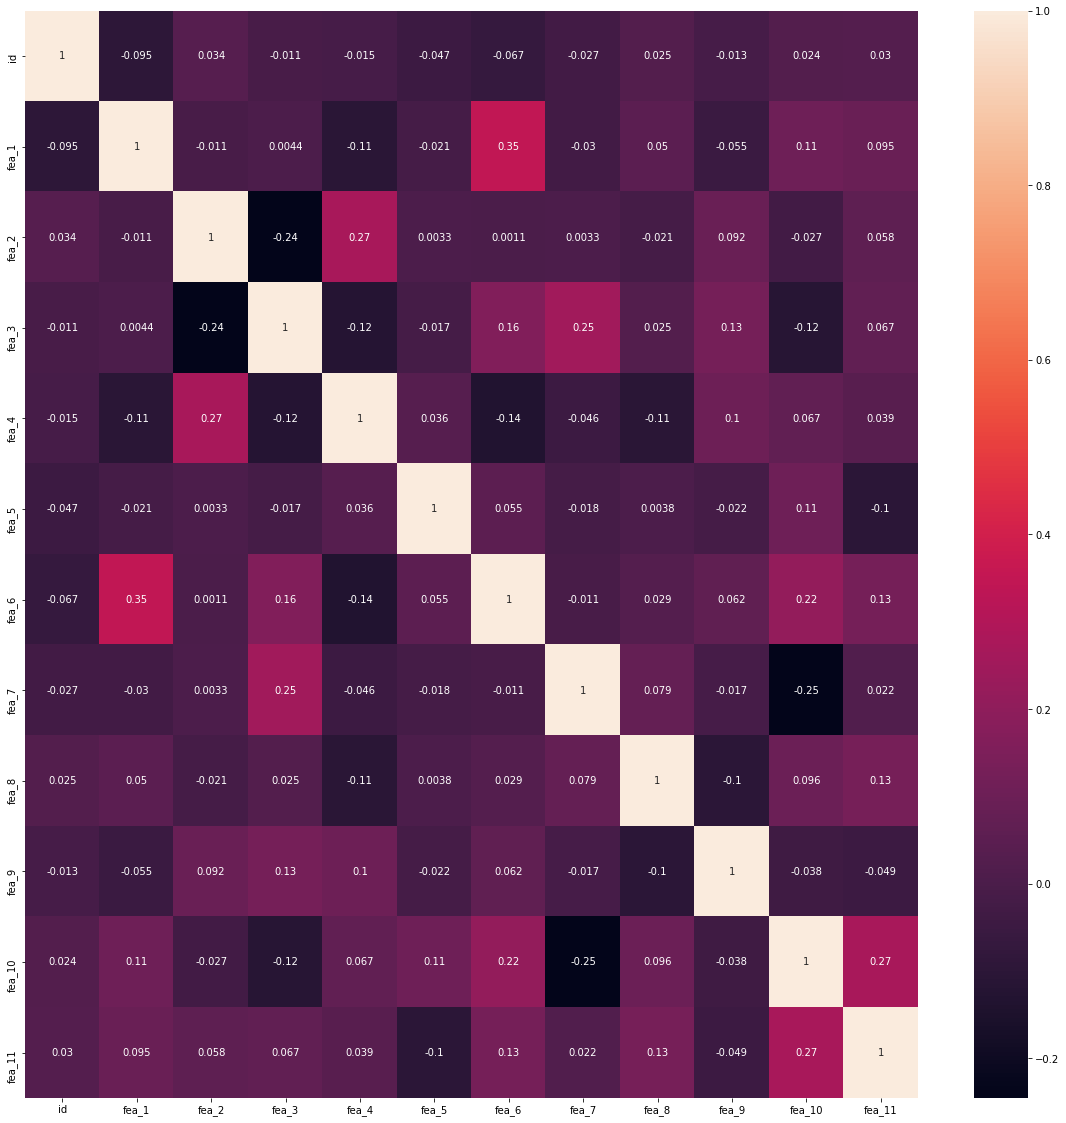

In [11]:
# let's check out correlation between different features 
import seaborn as sns
import matplotlib.pyplot as plt
corr = customer.iloc[:, customer.columns != 'label'].corr()
top_features = corr.index
plt.figure(figsize=(20,20))
sns.heatmap(customer[top_features].corr(), annot=True)

In [12]:
# In the above heatmap we can see that there are no major correlated independent variables present in the dataset
# Selecting features for Statistical Modelling using Univariate Analysis, i.e., by chi-square values
X = customer.iloc[:, customer.columns != 'label']
y = customer['label']

In [13]:
X.head()

,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,54982665,5,1245.5,3,77000,2,15,5,109,5,151300,244.948974
1,59004779,4,1277.0,1,113000,2,8,-1,100,3,341759,207.173840
2,58990862,7,1298.0,1,110000,2,11,-1,101,5,72001,1.000000
3,58995168,7,1335.5,1,151000,2,11,5,110,3,60084,1.000000
4,54987320,7,1283.9,2,59000,2,11,5,108,4,450081,197.403141


In [14]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: label, dtype: int64

The error message Input X must be non-negative says it all: Pearson's chi square test (goodness of fit) does not apply to negative values. It's logical because the chi square test assumes frequencies distribution and a frequency can't be a negative number. 

Lets try another method: feature selection by Featuure Importance
Feature Importance gives you a score of each feature in your data,
higher the score, more relevant is the feature

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [16]:
print(model.feature_importances_)

[0.12816353 0.02300151 0.12540368 0.03065709 0.15959646 0.01280244
 0.0258692  0.06124083 0.12984094 0.06634932 0.13080024 0.10627476]


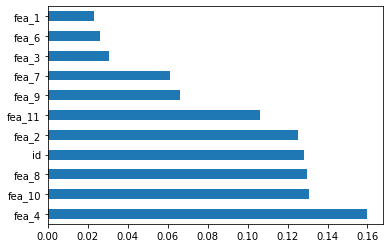

In [17]:
ranked_features = pd.Series(model.feature_importances_, index=X.columns)
ranked_features.nlargest(11).plot(kind='barh')
plt.show()

#### Recursive Feature Elimination

###### 1) works by recursively removing attributes and building a model on those attributes that remain
###### 2) uses model accuracy to identify which attributes (and combination og attributes) contribute the most to prediting the target attribute.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X,y)


#### Balancing

In [18]:
# lets have a look at how many of them are credit risky based on the data we have
# "label" column indicates whether the customer is credit risky or not
high_risk = round(customer['label'].value_counts()[1])
low_risk = round(customer['label'].value_counts()[0])
print('customers with higher risk: ', high_risk)
print('customers with lower risk: ', low_risk)

customers with higher risk:  225
customers with lower risk:  900


In [19]:
import seaborn as sns
#import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Count of Higher/Lower risk customers \n 0: Lower Risk || 1: higher Risk')

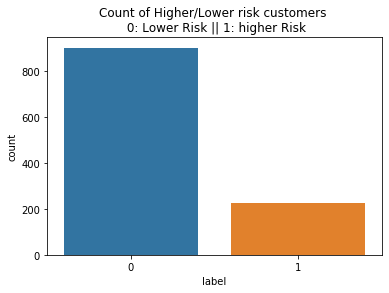

In [20]:
sns.countplot('label', data=customer)
plt.title('Count of Higher/Lower risk customers \n 0: Lower Risk || 1: higher Risk')

We can see that the cases classified as higher risk are very less than those of lower risk, therefore balancing is required
Need to balance the dataset

#### 1) Random  Undersampling

Reduces the number of majoruity class randomly down to the desired ratio against the miorty class. 

In [23]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [24]:
# Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [25]:
# Summarize class distribution 
print("Before Undersampling: ", Counter(y_train))

Before Undersampling:  Counter({0: 635, 1: 152})


In [26]:
# Define Undersampling Strategy
undersample = RandomUnderSampler(sampling_strategy='majority') #i.e., it will undersample majority group to match minority group

In [27]:
# fit and apply the transform [undersampling train sets]
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

In [28]:
# summarize class distribution
print("After undersampling: ", Counter(y_train_under))

After undersampling:  Counter({0: 152, 1: 152})


In [29]:
# import SVM libraries
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

In [30]:
# evaluation
model = SVC()
clf_under = model.fit(X_train_under, y_train_under)
pred_under = clf_under.predict(X_test)

print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, pred_under).round(2))

ROC AUC score for undersampled data:  0.45


#### 2) Oversampling with SMOTE (Synthetic Minority oversampling Technique)

Minority class is oversampled by creating "synthetic" examples tather than by over-sampling eith replacement. These introduced synthetic examples are based along the line segments joining a defined number of k minority class nearest neighbours, with k=5 by default in "imblearn".

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
# define over-sampling strategy
SMOTE = SMOTE()

In [33]:
# fit and apply transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

In [34]:
# Summarize class duistribution 
print('After Oversampling: ', Counter(y_train_SMOTE))

After Oversampling:  Counter({1: 635, 0: 635})


In [35]:
# import SVM libraries
#from sklearn.svm import SVC
#from sklearn.metrics import classification_report, roc_auc_score

In [86]:
# model = SVC()
clf_SMOTE = model.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE = clf_SMOTE.predict(X_test)

print("ROC AUC score for oversampled SMOTE data: ", roc_auc_score(y_test, pred_SMOTE).round(2))

ROC AUC score for oversampled SMOTE data:  0.45


So, the delima here is whether to do data balancing first or feature selection first?? If we do feature selection first, it could be computationally more efficient if we have large number of variables in the data. If we do Data balancing first, it could mean that feature selection process afterwards is more fair, as we will be performing it on balanced and ready data. So any changes in accordance with data balancing are taken into account while feature selection.

## Modeling

From above methods, we can see that Balancing by both under-, oversampling combined gives max score(0.563) followed by oversampling(0.52) and then undersampling(0.48). 

#### 1) Logistic Regression 

In [87]:
import sklearn

In [88]:
# To see which variables to use based on p-values
#from sklearn.linear_model import Logisticregresstion
import statsmodels.api as sm
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.484715
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.031     
Dependent Variable: label            AIC:              1114.6091 
Date:               2021-10-17 11:01 BIC:              1174.9155 
No. Observations:   1125             Log-Likelihood:   -545.30   
Df Model:           11               LL-Null:          -562.95   
Df Residuals:       1113             LLR p-value:      0.00022139
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
id        -0.0000     0.0000   -0.5246   0.5998   -0.0000    0.0000
fea_1      0.0987     0.0589    1.6771   0.0935   -0.0166 

The main thing to see here is, we have most of the p-values which are greater than 0.05. What does it mean?, How does it affect?? and What can we do about it???

In [89]:
Counter(y_train)

Counter({1: 152, 0: 635})

In [90]:
# Normal
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [91]:
y_pred1 = logreg.predict(X_test)
print('Accuracy of Logistic regression classifier: {:.2f}'.format(logreg.score(X_test,y_test)))

Accuracy of Logistic regression classifier: 0.78


In [92]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred1)
print(confusion_matrix)

[[265   0]
 [ 73   0]]


In [93]:
# for understanding
confusion_matrix = pd.crosstab(y_test, y_pred1, rownames=['Actual'], colnames=['predicted'])
print (confusion_matrix)

predicted    0
Actual        
0          265
1           73


###### 1) False Negative: Actually credit risky bt classified nto risky

In [94]:
Counter(y_train_under)

Counter({0: 152, 1: 152})

In [95]:
# Undersampled data
logreg = LogisticRegression()
logreg.fit(X_train_under, y_train_under)

LogisticRegression()

In [96]:
y_pred2 = logreg.predict(X_test)
print('Accuracy of Logistic regression classifier: {:.2f}'.format(logreg.score(X_test,y_test)))

Accuracy of Logistic regression classifier: 0.54


In [97]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred2)
print(confusion_matrix)

[[132 133]
 [ 24  49]]


In [98]:
# for understanding
confusion_matrix = pd.crosstab(y_test, y_pred2, rownames=['Actual'], colnames=['predicted'])
print (confusion_matrix)

predicted    0    1
Actual             
0          132  133
1           24   49


###### 1) False Positive: Actually not risky, but classified as risky are more
###### 2) False Negative: Actually Risky but classified as not risky are comparatively less

In [99]:
Counter(y_train_SMOTE)

Counter({1: 635, 0: 635})

In [100]:
# Oversampled Data
logreg = LogisticRegression()
logreg.fit(X_train_SMOTE, y_train_SMOTE)

LogisticRegression()

In [101]:
y_pred3 = logreg.predict(X_test)
print('Accuracy of Logistic regression classifier: {:.2f}'.format(logreg.score(X_test,y_test)))

Accuracy of Logistic regression classifier: 0.57


In [102]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred3)
print(confusion_matrix)

[[141 124]
 [ 23  50]]


In [103]:
# for understanding
confusion_matrix = pd.crosstab(y_test, y_pred3, rownames=['Actual'], colnames=['predicted'])
print(confusion_matrix)

predicted    0    1
Actual             
0          141  124
1           23   50


###### 1) False Negative: Actually risky but classified as not risky
###### 2) False Negative: Actually not risky but classified as risky

It is clear that we need to focus on two things. First on correct classification of Credit Risky customers. And second, more on reducing False Negatives, i.e., on reducing the classification error of classifying risky customers as non-risky. That means, our TP should be high and FP should be minimum.

In [104]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.85      0.50      0.63       265
           1       0.27      0.67      0.38        73

    accuracy                           0.54       338
   macro avg       0.56      0.58      0.51       338
weighted avg       0.72      0.54      0.57       338

              precision    recall  f1-score   support

           0       0.86      0.53      0.66       265
           1       0.29      0.68      0.40        73

    accuracy                           0.57       338
   macro avg       0.57      0.61      0.53       338
weighted avg       0.74      0.57      0.60       338



Accuracy for Logistic regression model is most ofr the original imbalanced data(0.81) followed by oversampled data(0.54), and then undersampled data(0.50). In this case, correctly classifying risky ones is more important, so we need to focus on that.

##### Based on first SVM and logistic regression above, we are going to use oversampled values from now on..

#### 2) Naive Bayes (Gaussian)

In [105]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_NB = gnb.fit(X_train_SMOTE, y_train_SMOTE).predict(X_test)
print("number of mislabeled points out of a total %d points: %d" % (X_test.shape[0], (y_test != y_pred_NB).sum()))

number of mislabeled points out of a total 338 points: 203


In [106]:
confusion_matrix_NB = pd.crosstab(y_test, y_pred_NB, rownames=['Actual'], colnames=['predicted'])
print(confusion_matrix_NB)

predicted   0    1
Actual            
0          82  183
1          20   53


#### 3) kNN

In [107]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_SMOTE)

StandardScaler()

In [108]:
X_train_SC = scaler.transform(X_train_SMOTE)
X_test_SC = scaler.transform(X_test)

In [109]:
# training and prediction
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_SC, y_train_SMOTE)

KNeighborsClassifier()

In [110]:
y_pred_kNN = classifier.predict(X_test)
confusion_matrix_kNN = pd.crosstab(y_test, y_pred_kNN, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_kNN)

Predicted    0   1
Actual            
0          173  92
1           50  23


In [111]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_kNN))

[[173  92]
 [ 50  23]]


Here we have randomly decided value of k=5. Although, it gives the same result for any other value of k, except 3. Result with k=3 is not that significant for this scenario either.

#### 4) Descision Tree

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_clf = clf.predict(X_test)
confusion_matrix_clf = pd.crosstab(y_test, y_pred_clf, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_clf)

Predicted    0   1
Actual            
0          200  65
1           52  21


In [114]:
print('Accuracy of Decision Tree: {:.2f}'.format(clf.score(X_test,y_test)))

Accuracy of Decision Tree: 0.65


#### 5) Random Forest

##### Binary classification by Random Forest:

AS we have a binary output here (trying to classify into either 0 or 1), we are using Random Forest Classifier insted of Random Forest Regressor

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rfc = RandomForestClassifier()
rfc.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_RF = rfc.predict(X_test)
confusion_matrix_RF = pd.crosstab(y_test, y_pred_RF, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_RF)

Predicted    0   1
Actual            
0          244  21
1           63  10


In [116]:
print('Accuracy of Random Forest classifier: {:.2f}'.format(rfc.score(X_test,y_test)))

Accuracy of Random Forest classifier: 0.75


##### Regression: 
Regression algorithms predict a continuous value based on the input variables. Main goal is to estimate a mapping function based on the input and output variables.

##### Classification:
It si a predictive model that approximates a mapping function from inout variables to identify discreate output variables, that can be labesl or catagories.

#### 6) XGBoost:

###### 1) good for binary classification
###### 2) works good with small datasets

In [117]:
#!pip install xgboost

In [118]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [119]:
xgb = XGBClassifier()
xgb.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_xgb = xgb.predict(X_test)
confusion_matrix_xgb = pd.crosstab(y_test, y_pred_clf, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_xgb)

C:\Users\avdho\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:01:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Predicted    0   1
Actual            
0          200  65
1           52  21


In [120]:
accuracy = accuracy_score(y_test, y_pred_xgb)
print('Accuracy for XGBoost: %.2f%%' % (accuracy * 100))

Accuracy for XGBoost: 75.15%


#### 7) AdaBoost:

In [121]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(X_train_SMOTE, y_train_SMOTE)

AdaBoostClassifier()

In [122]:
y_pred_adb = adb.predict(X_test)
confusion_matrix_adb = pd.crosstab(y_test, y_pred_adb, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_adb)

Predicted    0   1
Actual            
0          212  53
1           53  20


In [123]:
accuracy_adb = accuracy_score(y_test, y_pred_adb)
print('Accuracy for XGBoost: %.2f%%' % (accuracy_adb * 100))

Accuracy for XGBoost: 68.64%
